<a href="https://colab.research.google.com/github/jonathanmaxberman/RenalPractice/blob/main/GFR_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FloatSlider(value=12.5, description='Kf(ml/min/mmHg):', max=15.0)

FloatSlider(value=50.0, description='Pgc(mmHg):', step=1.0)

FloatSlider(value=15.0, description='Pbs(mmHg):', step=1.0)

FloatSlider(value=28.0, description='πgc(mmHg):', step=1.0)

FloatSlider(value=0.0, description='πbs(mmHg):', step=1.0)

FloatSlider(value=0.9, description='σ:', max=1.0, step=0.01)

Button(description='Update', style=ButtonStyle())

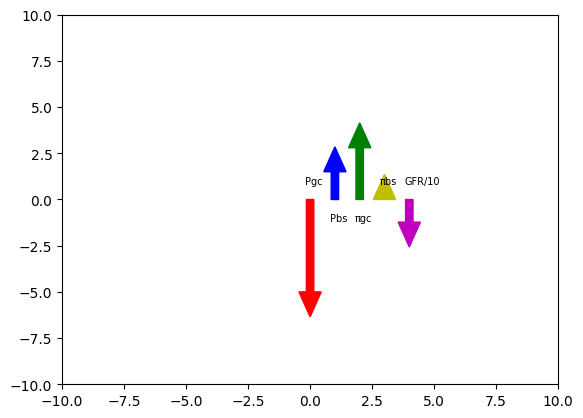

Calculated GFR: 122.50000000000001 ml/min


In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
import ipywidgets as widgets
def starling_equation(Kf, Pgc, Pbs, pi_gc, pi_bs, sigma):
    return Kf * ((Pgc - Pbs) - sigma * (pi_gc - pi_bs))
Kf_widget = widgets.FloatSlider(min=0, max=15, step=0.1, value=12.5, description='Kf(ml/min/mmHg):')
Pgc_widget = widgets.FloatSlider(min=0, max=100, step=1, value=50, description='Pgc(mmHg):')
Pbs_widget = widgets.FloatSlider(min=0, max=100, step=1, value=15, description='Pbs(mmHg):')
pi_gc_widget = widgets.FloatSlider(min=0, max=100, step=1, value=28, description='πgc(mmHg):')
pi_bs_widget = widgets.FloatSlider(min=0, max=100, step=1, value=0, description='πbs(mmHg):')
sigma_widget = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.9, description='σ:')
from IPython.display import clear_output

def update_plot(Kf, Pgc, Pbs, pi_gc, pi_bs, sigma):

    GFR = starling_equation(Kf, Pgc, Pbs, pi_gc, pi_bs, sigma)
    
    fig, ax = plt.subplots()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    Pgc_arrow = FancyArrow(0, 0, 0, -Pgc/10, color='r', width=0.3)
    Pbs_arrow = FancyArrow(1, 0, 0, Pbs/10, color='b', width=0.3)
    pi_gc_arrow = FancyArrow(2, 0, 0, +pi_gc/10, color='g', width=0.3)
    pi_bs_arrow = FancyArrow(3, 0, 0, -pi_bs/10, color='y', width=0.3)
    GFR_arrow = FancyArrow(4, 0, 0, -GFR/100, color='m', width=0.3)
    
    ax.add_patch(Pgc_arrow)
    ax.add_patch(Pbs_arrow)
    ax.add_patch(pi_gc_arrow)
    ax.add_patch(pi_bs_arrow)
    ax.add_patch(GFR_arrow)
    
    ax.text(-0.2, 1, 'Pgc', va='center', fontsize=7)
    ax.text(0.8, -1, 'Pbs', va='center', fontsize=7)
    ax.text(1.8, -1, 'πgc', va='center', fontsize=7)
    ax.text(2.8, 1, 'πbs', va='center', fontsize=7)
    ax.text(3.8, 1, 'GFR/10', va='center', fontsize=7)
    
    return fig, ax, GFR

update_button = widgets.Button(description='Update')

def on_button_clicked(b):
    fig, ax, GFR = update_plot(Kf=Kf_widget.value, Pgc=Pgc_widget.value, Pbs=Pbs_widget.value, pi_gc=pi_gc_widget.value, pi_bs=pi_bs_widget.value, sigma=sigma_widget.value)
    clear_output(wait=True)
    display(Kf_widget, Pgc_widget, Pbs_widget, pi_gc_widget, pi_bs_widget, sigma_widget, update_button)
    plt.show()
    print(f'Calculated GFR: {GFR} ml/min')

update_button.on_click(on_button_clicked)
display(Kf_widget, Pgc_widget, Pbs_widget, pi_gc_widget, pi_bs_widget, sigma_widget, update_button)